# Week 4 - k-means clustering

In this lab we'll implement the k-means algorithm.

We will represent points in the space as tuples, and use lists of tuples for our dataset, like so:

In [1]:
# Five two-dimensional points
example_data_2d = [(2,3),(5,3.4),(1.3,0.2),(3.1,3),(2.2,4)]

# Five three-dimensional points
example_data_3d = [(2,3,1.2),(5,3.4,4),(1.3,0.2,5.2),(3.1,3,3),(2.2,4,2)]

These algorithms can be written more efficiently using numpy arrays. All the hints are set up to assume that you will write your functions using lists of tuples, but if you're experienced with Python, you can try using numpy arrays instead. Numpy implements vectorised maths and so it will be faster to run, and in many cases more concise to write.

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Data 

We'll use 2D data points so it's easy to visualise our results. This code generates some "real" clusters probabilistically, and a smattering of random points all over the space.

In [3]:
# cluster 3 is a little more widely spread than clusters 1 and 2

# cluster1 is centred at (1,1) and has standard deviation 0.2, and 20 points
cluster1 = np.random.randn(20,2)*0.2+np.array([[1,1]])
cluster2 = np.random.randn(20,2)*0.3+np.array([[2,1]])
cluster3 = np.random.randn(20,2)*0.2+np.array([[1.5,2]])
background = np.random.uniform(low=[0,0],high=[3,3],size=(30,2))

In [4]:
points_array = np.concatenate([cluster1,cluster2,cluster3,background])
# We'll represent the points as a list of tuples
points = [tuple(p) for p in points_array]
# Show the first five
print(points[:5])

[(1.1734318544224744, 0.7478535885235174), (1.004027761274101, 0.8588562824050319), (1.1319243451748342, 1.0178900650817144), (0.6234443409912472, 1.1746634011120742), (1.1524618126149306, 0.7502946326034169)]


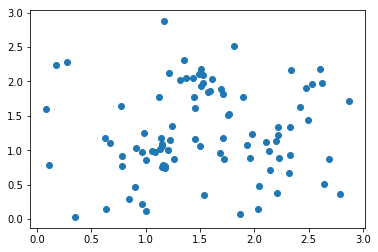

In [6]:
# Plot the points
# NB if using a numpy array instead of a list, we'd write
#   plt.scatter(points[:,0],points[:,1])

x_values = [x for (x,y) in points]
y_values = [y for (x,y) in points]
plt.scatter(x_values, y_values)

## K-means 

The function to initialise centroids is provided for you. This function returns a list of k centroids, randomly placed. Notice that it is completely random - we could improve this function by trying to space the centroids far apart from one another.

In [8]:
def initialise_centroids(data, k):
    """
    Place centroids randomly into range of data of arbitrary dimension.
    Takes a list of N data points.
    Returns a list of k centroids, each of which will be a tuple of the same
    dimensionality as the data points.
    """
    d = len(data[0])
    # Make the data into a numpy array
    arr = np.array(data)
    minvals = np.min(data,axis=0)
    maxvals = np.max(data,axis=0)
    centroids = np.random.uniform(low=minvals,high=maxvals,size=(k,d))
    # Return our centroids as a list of tuples
    return [tuple(c) for c in centroids]

**Exercise 1:**

Complete the function `assign_points()`. Given a list of k centroids and a list of N points, find which is the closest centroid to each point. Your function should return a list of N integers. Each integer should be a number from 0 to k-1, corresponding to the closest centroid for that point.

In [9]:
# This function is provided for you. It calculates Euclidean distance between two points.
from kmeans_utilities import euclidean_distance
print(euclidean_distance((1,1),(3,3)))

2.8284271247461903


In [10]:
def assign_points(centroids, data):
    """
    Assign each point to its closest centroid.
    Take in an array of shape (k,d) representing centroid coordinates,
    and an array of shape (N,d) representing data coordinates.
    Return a list or array of N values where each value is between 0 and k-1
    and represents the centroid that the data point has been assigned to.
    """
    # Here is code for a wrong answer, which just assigns every point to cluster 0
    # (i.e. to the first centroid in the list).
    # Change this code to assign points to their nearest centroids.
    N = len(data)
    closest_centroids = [0]*N
    return closest_centroids

In [ ]:
# Should return [0, 1, 0, 1, 1]
example_centroids = [(2,2),(4,4)]
assign_points(example_centroids, example_data_2d)

In [ ]:
# Should return [1, 0, 1, 1, 1]
example_centroids = [(5,2,0),(3,1,1)]
assign_points(example_centroids, example_data_3d)

**Exercise 2:**

Complete the function `calculate_mean_centroids()`. This function should take in the list of data points, the list of assignments to clusters, and k, and return the a list of centroids.

The function `average_point()` is provided for you. Given a list of points, it finds the mean. You need to pass it the correct points for each cluster.

In [12]:
# This function is provided for you
from kmeans_utilities import average_point

In [13]:
def calculate_mean_centroids(data, assignments, k):
    """
    Take list of N data points (a list of tuples)  
    and a list of N centroid assignments, 
    and return a list of k centroids.
    """
    # Here is an incorrect solution that just sets each centroid to (0,0)
    # (or (0,0,0), or (0,0,0,0) etc, depending on the dimension of the data points)
    # Replace this code so that the averages are calculated for each cluster.
    N = len(data)
    d = len(data[0])
    # Set points to zero (wrong!)
    zero_centroid = tuple([0]*d)
    centroids = [zero_centroid]*N
    return centroids

In [ ]:
# Should return centroids [( 1.65,  1.6 ), (3.43333333,  3.46666667)]
calculate_mean_centroids(example_data_2d, [0, 1, 0, 1, 1], 2)

In [ ]:
# Should return centroids [(5, 3.34, 4), (2.15,2.55,2.85)]
calculate_mean_centroids(example_data_3d, [1, 0, 1, 1, 1], 2)

**Exercise 3:**

Complete the `kmeans()` function to carry out k-means clustering. You can use the functions you created in the first two exercises. You only need to fill in the missing lines in the iterative loop.

In [17]:
# These function is provided for you (and used already below)
from kmeans_utilities import points_equal, plot_kmeans

In [18]:
def kmeans(data, k):
    """
    Implement k-means clustering on a given set of points.
    data should be a list of N points, where each point is a tuple.
    Returns a tuple of (centroids, cluster_assignments)
    where 
    centroids is a list of centroid points, and each centroid is a tuple
    cluster_assignments a list of N numbers representing cluster assignments,
     where each number is between 0 and k-1.
    """
    N = len(data)
    d = len(data[0])
    centroids = initialise_centroids(data, k)
    cluster_assignments = assign_points(centroids, data)
    old_centroids = [(0,)*d]*k  # unlikely to be equal to centroids at start
    while not points_equal(centroids,old_centroids):
        old_centroids = centroids
        ### YOUR CODE HERE: Fill in the iterative k-means steps 
        
        ###
        # Optionally, if you'd like to plot what is happening at each step, 
        # uncomment the following line
        #plot_kmeans(data, centroids, assignments, k)
    
    return (centroids, cluster_assignments)


In [ ]:
# Answer can be random depending on random initialisation. 
# Likely solutions are:
# centroids [(1.3,0.2),(3.075,3.35)]
# cluster assignments [1, 1, 0, 1, 1] or [0, 0, 1, 0, 0]
#  OR
# centroids [(2.1,3.5),(3.1333,2.2)]
# cluster assignments [0, 1, 1, 1, 0] or [1, 0, 0, 0, 1]
#  OR
# centroids [(5,3.4),(2.15,2.55)]
# cluster assignments [1, 0, 1, 1, 1] or [0, 1, 0, 0, 0]

kmeans(example_data_2d,2)

Now test on the 2D data we created at the top of the notebook:

In [ ]:
k = 3
centroids, assignments = kmeans(points, k)
print(centroids)
print(assignments)

In [ ]:
plot_kmeans(points, centroids, assignments, k)